In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
df=pd.read_csv('data.csv')
df.shape

(10000, 13)

In [4]:
df.columns

Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Run Time in minutes',
       'Movie Rating', 'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification',
       'Director', 'Stars', 'Description'],
      dtype='object')

In [72]:
df.head(5)

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [74]:
df.info

<bound method DataFrame.info of       Unnamed: 0  ...                                        Description
0              0  ...  ['Over', 'the', 'course', 'of', 'several', 'ye...
1              1  ...  ['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'...
2              2  ...  ['An', 'anime', 'adaptation', 'of', 'the', 'Hi...
3              3  ...  ['Lazy,', 'uneducated', 'students', 'share', '...
4              4  ...  ['When', 'the', 'menace', 'known', 'as', 'the'...
...          ...  ...                                                ...
9995        9995  ...  ['The', 'gang', 'encounters', 'with', 'some', ...
9996        9996  ...  ['After', 'a', 'lifetime', 'of', 'scams,', 'a'...
9997        9997  ...  ['A', 'father', "doesn't", 'want', 'his', 'thr...
9998        9998  ...  ['An', 'intimate', 'relationship', 'between', ...
9999        9999  ...  ['With', 'the', "world's", 'end', 'imminent,',...

[10000 rows x 13 columns]>

In [75]:
df.dtypes

Unnamed: 0               int64
Movie Name              object
Year of Release          int64
Run Time in minutes      int64
Movie Rating           float64
Votes                    int64
MetaScore              float64
Gross                  float64
Genre                   object
Certification           object
Director                object
Stars                   object
Description             object
dtype: object

In [76]:
df.describe()

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,7974.000000,7.085000e+03
mean,4999.50000,2001.413600,110.725000,6.727020,9.279738e+04,59.171432,4.017500e+07
std,2886.89568,18.597804,22.053073,0.821264,1.716509e+05,17.268795,6.748658e+07
min,0.00000,1915.000000,45.000000,4.900000,1.000200e+04,7.000000,0.000000e+00
25%,2499.75000,1994.000000,96.000000,6.100000,1.685175e+04,47.000000,2.340000e+06
50%,4999.50000,2007.000000,107.000000,6.700000,3.417950e+04,60.000000,1.693000e+07
75%,7499.25000,2015.000000,121.000000,7.300000,9.154600e+04,72.000000,4.864000e+07
max,9999.00000,2023.000000,439.000000,9.300000,2.804443e+06,100.000000,9.366600e+08


In [5]:
#print teh categorical columns
categorical = df.select_dtypes(include=['object']).columns
print(categorical )
df[categorical].describe()

Index(['Movie Name', 'Genre', 'Certification', 'Director', 'Stars',
       'Description'],
      dtype='object')


,Movie Name,Genre,Certification,Director,Stars,Description
count,10000,10000,9631,10000,10000,10000
unique,9632,425,24,4162,9947,9996
top,The Mummy,"['Comedy', ' Drama', ' Romance']",R,['Woody Allen'],"['William Shatner', 'Leonard Nimoy', 'DeForest...","['When', 'three', 'young', 'women', 'are', 'im..."
freq,4,481,4048,47,6,2


In [16]:
df.rename(columns={'Unnamed: 0':'SLNO'})

,SLNO,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."


In [78]:
df['Movie Name'].describe()

count         10000
unique         9632
top       The Mummy
freq              4
Name: Movie Name, dtype: object

In [79]:
df['Certification'].describe()

count     9631
unique      24
top          R
freq      4048
Name: Certification, dtype: object

In [80]:
df['Gross'].describe()

count    7.085000e+03
mean     4.017500e+07
std      6.748658e+07
min      0.000000e+00
25%      2.340000e+06
50%      1.693000e+07
75%      4.864000e+07
max      9.366600e+08
Name: Gross, dtype: float64

In [81]:
missing_counts = df.isna().sum()
print(missing_counts)


Unnamed: 0                0
Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64


In [82]:
mean_gross_income = df['Gross'].mean()
print(mean_gross_income)

40175003.52858151


In [84]:
df['Gross'].fillna(mean_gross_income,inplace=True)

In [85]:
missing_counts = df.isna().sum()
print(missing_counts)

Unnamed: 0                0
Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                     0
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64


In [87]:
Meta_Score_a= df['MetaScore'].mean()
Meta_Score_a

59.171432154502135

In [88]:
df['MetaScore'].fillna(mean_gross_income,inplace=True)

In [89]:
missing_counts = df.isna().sum()
print(missing_counts)

Unnamed: 0               0
Movie Name               0
Year of Release          0
Run Time in minutes      0
Movie Rating             0
Votes                    0
MetaScore                0
Gross                    0
Genre                    0
Certification          369
Director                 0
Stars                    0
Description              0
dtype: int64


In [90]:
Movie Title and Year:
What is the distribution of movie releases by year? Are there any trends over time?
Which movie has the highest user rating, and in which year was it released?
Are there any patterns or themes in movie titles based on genres or years?
Ratings and Reviews:
4. Is there a correlation between IMDb user ratings and Metascore ratings?

Which genre tends to receive the highest ratings on average?
How does the number of votes (popularity) correlate with IMDb user ratings?
Are there movies with high IMDb user ratings but low Metascore ratings, and vice versa?
Financial Performance:
8. What is the distribution of gross income for movies? Are there any outliers or blockbuster movies?

Are there any trends in gross income over the years, and do certain genres tend to perform better financially?
Do movies with higher ratings tend to generate more gross income?
Movie Length and Certification:
11. What is the average runtime of movies, and does it vary by genre?

How does the movie certification (e.g., PG-13, R, etc.) affect ratings and financial performance?
Are there any trends in certification over the years?
Genre Analysis:
14. Which genres are the most popular, and do their popularity change over time?

Are there any genres that consistently receive high ratings from both users and critics?
Are there any interesting combinations of genres that tend to perform well?
Movie Description and Cast:
17. Can we identify common keywords or phrases in movie descriptions that are associated with high ratings or financial success?

Are there any actors or directors who are frequently associated with highly-rated or high-grossing movies?
Miscellaneous Insights:
19. Are there any notable exceptions where movies with lower ratings or unusual characteristics (e.g., extremely long runtimes) achieve high financial success?

SyntaxError: invalid syntax (757231160.py, line 1)

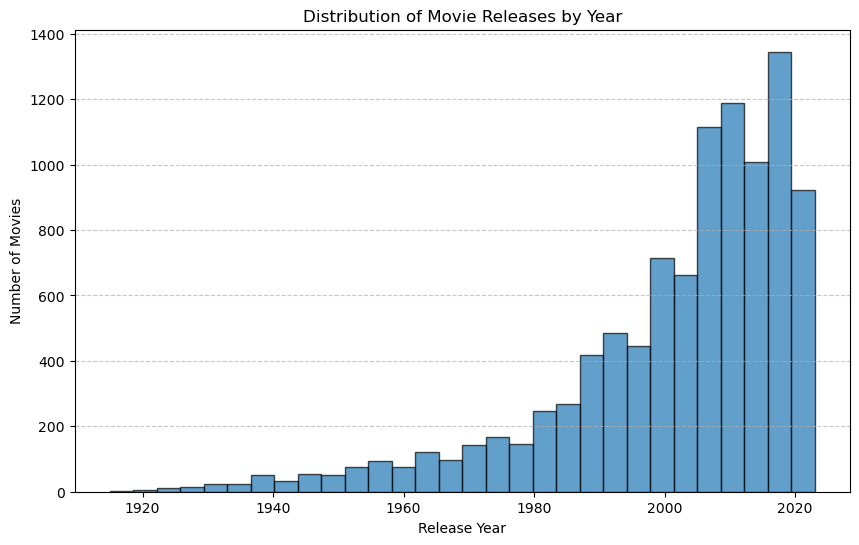

In [101]:
#histogram to show the distribution of movie releases by year
plt.figure(figsize=(10, 6))
plt.hist(df['Year of Release'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Movie Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


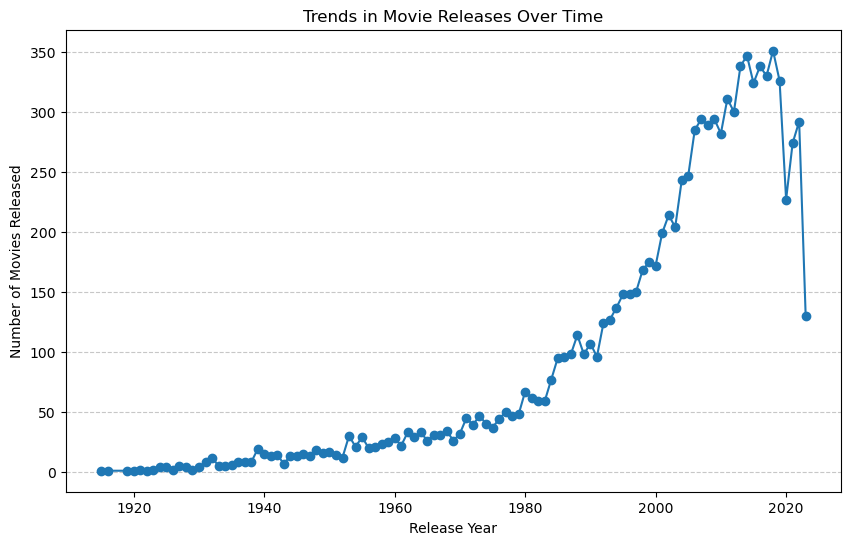

In [95]:
# line plot to show trends in movie releases over time
year_counts = df['Year of Release'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Trends in Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
#Which movie has the highest user rating, and in which year was it released?
Heighestmovierating=df[df['Movie Rating']==df['Movie Rating'].max()]
moviename=Heighestmovierating['Movie Name'].values[0]
RealesedmovieYear=Heighestmovierating['Year of Release'].values[0]
print(moviename)
print(Heighestmovierating)
print(RealesedmovieYear)


The Shawshank Redemption
   Unnamed: 0                Movie Name  Year of Release  Run Time in minutes  \
0           0  The Shawshank Redemption             1994                  142   

   Movie Rating    Votes  MetaScore       Gross      Genre Certification  \
0           9.3  2804443       82.0  28340000.0  ['Drama']             R   

             Director                                              Stars  \
0  ['Frank Darabont']  ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...   

                                         Description  
0  ['Over', 'the', 'course', 'of', 'several', 'ye...  
1994


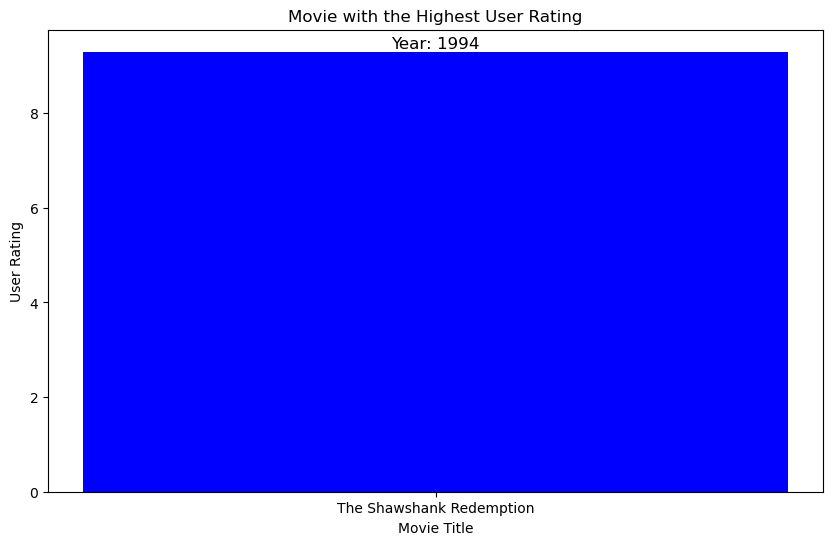

In [24]:
# Create a bar plot to visualize the highest-rated movie
plt.figure(figsize=(10, 6))
plt.bar(moviename,Heighestmovierating['Movie Rating'].values[0], color='blue')
plt.title('Movie with the Highest User Rating')
plt.xlabel('Movie Title')
plt.ylabel('User Rating')
plt.text(moviename,Heighestmovierating['Movie Rating'].values[0], f"Year: {RealesedmovieYear}", ha='center', va='bottom', color='black', fontsize=12)
plt.show()

In [27]:
# Is there a correlation between IMDb user ratings and Metascore ratings
correlation=df['Movie Rating'].corr(df['MetaScore'])
if correlation > 0:
    interpretation = "There is a positive correlation."
elif correlation < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no significant correlation."

print(f"Pearson correlation coefficient: {correlation:.2f}")
print(interpretation)

Pearson correlation coefficient: 0.72
There is a positive correlation.


In [36]:
#Which genre tends to receive the highest ratings on average
average = df.groupby('Genre')['Movie Rating'].mean()
heighestratedgenre=average.idxmax()
print(heighestratedgenre)
heigheavg=average.max()
print(heigheavg)



['Adventure', ' Western']
8.8


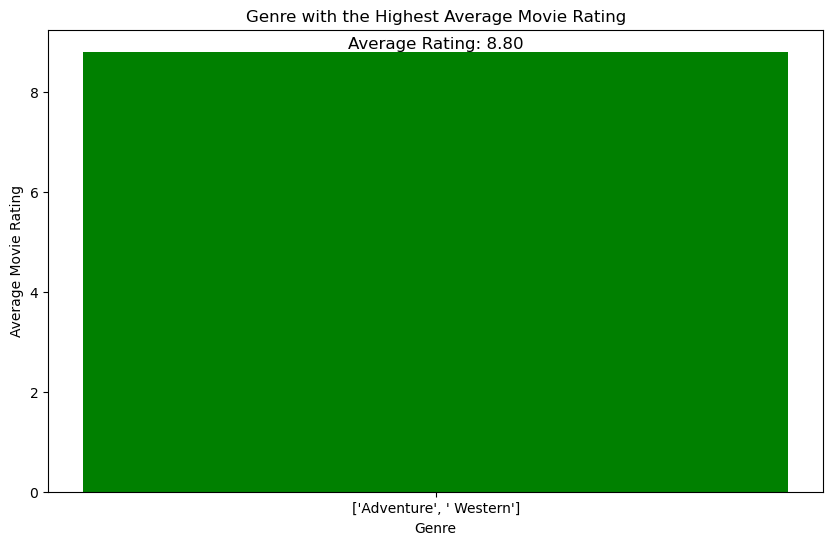

In [39]:
# Create a bar plot to visualize the highest-rated genre
plt.figure(figsize=(10, 6))
plt.bar(heighestratedgenre,heigheavg, color='green')
plt.title('Genre with the Highest Average Movie Rating')
plt.xlabel('Genre')
plt.ylabel('Average Movie Rating')
plt.text(heighestratedgenre,heigheavg, f"Average Rating: {heigheavg:.2f}", ha='center', va='bottom', color='black', fontsize=12)
plt.show()

In [42]:
#How does the number of votes (popularity) correlate with IMDb user ratings?
correlation=df['Votes'].corr(df['Movie Rating'])
if correlation > 0:
    interpretation = "There is a positive correlation."
elif correlation < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no significant correlation."

print(f"Pearson correlation coefficient: {correlation:.2f}")
print(interpretation)

Pearson correlation coefficient: 0.31
There is a positive correlation.


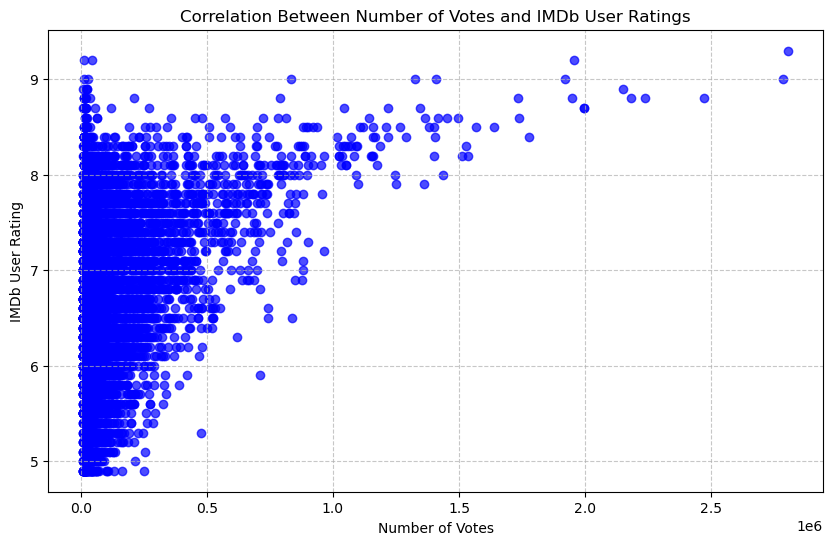

In [43]:
# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Movie Rating'], c='blue', alpha=0.7)
plt.title('Correlation Between Number of Votes and IMDb User Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb User Rating')
plt.grid(linestyle='--', alpha=0.7)

In [44]:
# Find movies with high IMDb ratings but low Metascore ratings
high_imdb_low_metascore = df[(df['Movie Rating'] >= 8.0) & (df['MetaScore'] <= 60)]

# Find movies with high Metascore ratings but low IMDb ratings
high_metascore_low_imdb = df[(df['MetaScore'] >= 80) & (df['Movie Rating'] <= 7.0)]

# Print the results
print("Movies with High IMDb Ratings but Low Metascore Ratings:")
print(high_imdb_low_metascore)

print("\nMovies with High Metascore Ratings but Low IMDb Ratings:")
print(high_metascore_low_imdb)

Movies with High IMDb Ratings but Low Metascore Ratings:
     Unnamed: 0                                  Movie Name  Year of Release  \
58           58                           Life Is Beautiful             1997   
85           85                            The Intouchables             2011   
106         106                                       Joker             2019   
170         170  Star Wars: Episode VI - Return of the Jedi             1983   
175         175                       Judgment at Nuremberg             1961   
238         238                                   The Thing             1982   
240         240                                      Snatch             2000   
529         529                            Scent of a Woman             1992   
538         538                                    Big Fish             2003   
558         558                                    Papillon             1973   
560         560                                      Ip Man    

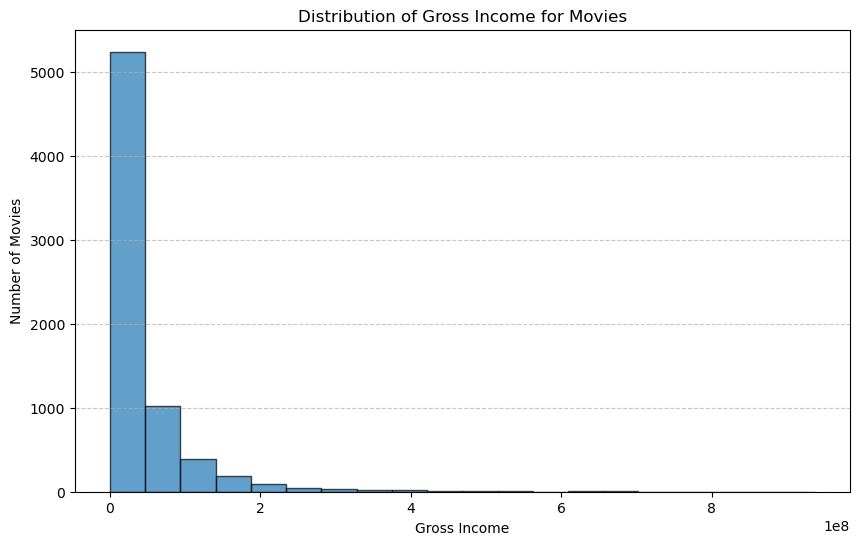

In [45]:
# Create a histogram to visualize the distribution of gross income
plt.figure(figsize=(10, 6))
plt.hist(df['Gross'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Gross Income for Movies')
plt.xlabel('Gross Income')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

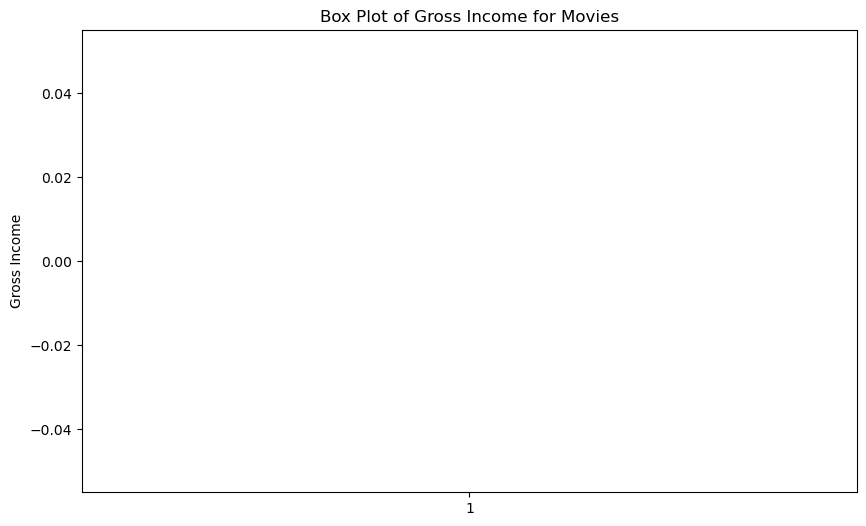

In [53]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Gross'])
plt.title('Box Plot of Gross Income for Movies')
plt.ylabel('Gross Income')
plt.show() 








In [58]:
#Are there any trends in gross income over the years, and do certain genres tend to perform better financially?
#Do movies with higher ratings tend to generate more gross income?
yearly_income= df.groupby('Year of Release')['Gross'].sum()
yearly_income

Year of Release
1915    1.000000e+07
1916    2.180000e+06
1919    0.000000e+00
1920    0.000000e+00
1921    5.450000e+06
            ...     
2019    1.044543e+10
2020    1.260960e+09
2021    3.963690e+09
2022    6.246510e+09
2023    0.000000e+00
Name: Gross, Length: 107, dtype: float64

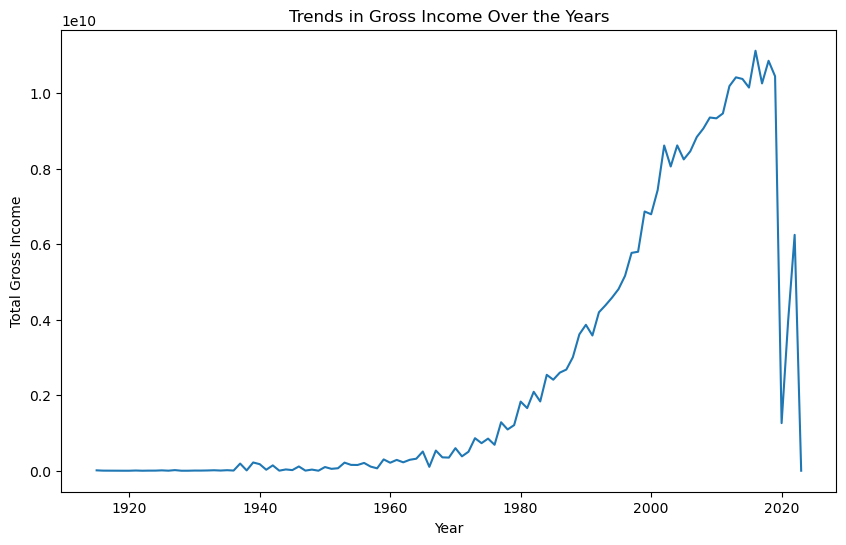

In [59]:
# Create a line plot or bar plot to show the trends
plt.figure(figsize=(10, 6))
yearly_income.plot(kind='line')
plt.title('Trends in Gross Income Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Income')
plt.show()

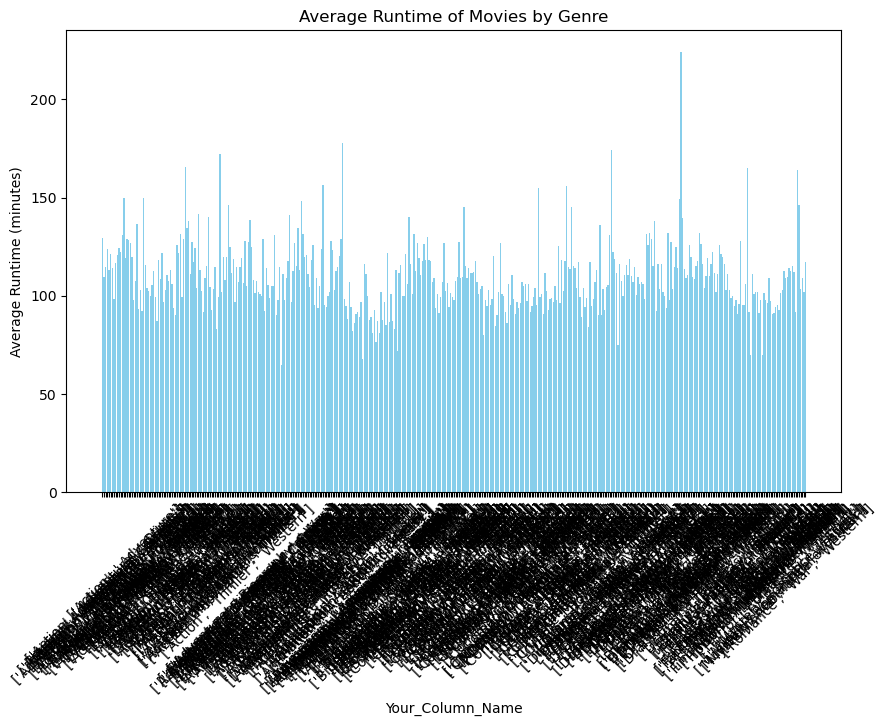

In [75]:
average_runtime_by_genre = df.groupby('Genre')['Run Time in minutes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_runtime_by_genre['Genre'], average_runtime_by_genre['Run Time in minutes'], color='skyblue')
plt.title('Average Runtime of Movies by Genre')
plt.xlabel('Your_Column_Name')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



<Figure size 2500x1000 with 0 Axes>

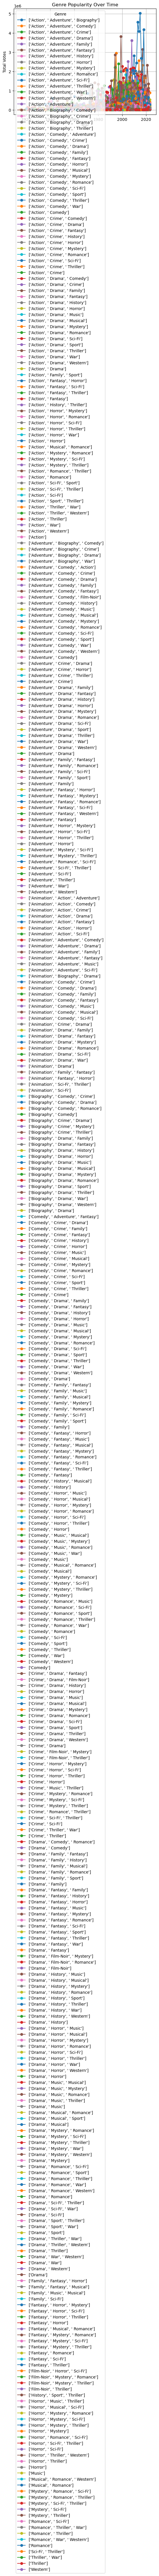

In [87]:
# Group by year and genre, and calculate popularity (e.g., total votes)
popularity_by_year_genre = df.groupby(['Year of Release', 'Genre'])['Votes'].sum().unstack()

# Create line plots to visualize genre popularity over time
plt.figure(figsize=(25, 10))
popularity_by_year_genre.plot(kind='line', marker='o')
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend(title='Genre')
plt.grid(True)
plt.show()





